#### Greg Walsh
#### DSSA-5104-091 - DEEP LEARNING
#### Spring 2020
#### Voting records - party prediction
#### Neural Network for binary classification

In [11]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load in Data 
dataset = pd.read_csv("votingrecords.csv", header = None)

# set random seed for reproducibility
np.random.seed(7)

In [12]:
# Lets look at the data 
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
3,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
4,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [13]:
# Our data is y's and n's and a NN needs 1's and 0's so were going to use LabelEncoder()
data = dataset.apply(LabelEncoder().fit_transform) 

# Convert dataframe into a numpy array
df = data.values

print(df)

# Shows # of observations and variables 
print(df.shape)

[[0 0 1 ... 1 1 1]
 [1 0 1 ... 1 0 1]
 [0 1 1 ... 0 1 1]
 ...
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 1]]
(232, 17)


In [14]:
# This is a much better format. Now we can split into our X and Y Variables 
# X is our input
# Y is our output 
X = df[:,1:17]
Y = df[:,0]

In [20]:
# Set Epochs 
epochs = 50 
# Create NN Model
model = Sequential()
model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# Compile the NN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the NN 50 with epochs 
history = model.fit(X,Y,epochs=epochs,batch_size=10, verbose=0)

# Evaluate the NN
scores = model.evaluate(X, Y)

# Predict the NN 
Y_predict = model.predict(X)

# Print our Accuracy and Loss 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))




232/232 [==============================] - 0s 138us/step

accuracy: 98.71%

loss: 4.34%


In [21]:
# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('================')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

Confusion Matrix
True negatives:  122
False negatives:  1
False positives:  2
True positives:  107


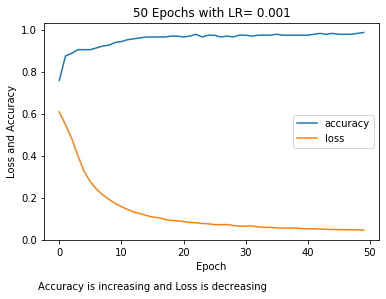

In [23]:
# Plot Loss and Accuracy by Epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('50 Epochs with LR= 0.001')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.text(15,-0.2, 'Accuracy is increasing and Loss is decreasing', ha='center', va='top')
plt.show()